##Deep Learning Regression with Admissions Data
This project predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores) using Deep Learning Regression Model. This project used tf.keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [2]:
#Load dataset, and investigate to gain familiarity 
dataset = pd.read_csv(r'C:\Users\DaReaders\Desktop\Path to Data Science\Deep Learning\admissions_data.csv')
print(dataset.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
#Drop Serial No. column, does not hold any useful information.
dataset = dataset.drop(['Serial No.'], axis = 1)
print(dataset.describe())

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.5600

##Split data into labels and features

In [4]:
#Labels are contained in the “Chance of Admit” column which is the last column in the dataframe.
labels = dataset.iloc[:, -1] #select all the rows (:), and access the last column (-1)
features = dataset.iloc[:, 0:-1] #select all the rows (:), and access columns from 0 to the last 

In [5]:
#Split data into training set and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state=24)

## Normalize the data.
Columns such as GRE Score and University Rating do not have equal weights. Normalize numerical features so that all columns have equal weight.

In [6]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

## Create a neural network model

In [7]:
def design_model(X):
    model = Sequential()
    input = tf.keras.Input(shape=(X.shape[1],))
    model.add(input)
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))

    #Initalize the optimizer and compile the model
    #Create an instance of Adam optimizer
    opt = Adam(learning_rate = 0.001)
    model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)
    return model

In [8]:
# Apply the model to the scaled training data
model = design_model(features_train_scaled)

In [9]:
# Apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Fit the model

In [10]:
history = model.fit(features_train_scaled, labels_train, epochs = 500, batch_size = 16, verbose = 1, validation_split = 0.2, callbacks = [es])

Epoch 1/500
20/20 [==============================] - 0s 11ms/step - loss: 1.8107 - mae: 1.0693 - val_loss: 1.0954 - val_mae: 0.7984
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1.0826 - mae: 0.8188 - val_loss: 0.6640 - val_mae: 0.6152
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6736 - mae: 0.6433 - val_loss: 0.4473 - val_mae: 0.5008
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4896 - mae: 0.5454 - val_loss: 0.3347 - val_mae: 0.4377
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3843 - mae: 0.4886 - val_loss: 0.2701 - val_mae: 0.3954
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2922 - mae: 0.4260 - val_loss: 0.2340 - val_mae: 0.3694
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2590 - mae: 0.3970 - val_loss: 0.2117 - val_mae: 0.3583
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2372 - 

20/20 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0737 - val_loss: 0.0075 - val_mae: 0.0642
Epoch 64/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0728 - val_loss: 0.0074 - val_mae: 0.0643
Epoch 65/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0711 - val_loss: 0.0073 - val_mae: 0.0629
Epoch 66/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0714 - val_loss: 0.0072 - val_mae: 0.0618
Epoch 67/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0683 - val_loss: 0.0072 - val_mae: 0.0626
Epoch 68/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0707 - val_loss: 0.0072 - val_mae: 0.0643
Epoch 69/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mae: 0.0676 - val_loss: 0.0071 - val_mae: 0.0630
Epoch 70/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0079 - mae: 0

Epoch 125/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0567 - val_loss: 0.0058 - val_mae: 0.0553
Epoch 126/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0586 - val_loss: 0.0058 - val_mae: 0.0549
Epoch 127/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0064 - mae: 0.0600 - val_loss: 0.0059 - val_mae: 0.0548
Epoch 128/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0064 - mae: 0.0596 - val_loss: 0.0057 - val_mae: 0.0537
Epoch 129/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0556 - val_loss: 0.0057 - val_mae: 0.0535
Epoch 130/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0059 - mae: 0.0570 - val_loss: 0.0057 - val_mae: 0.0532
Epoch 131/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0059 - mae: 0.0574 - val_loss: 0.0057 - val_mae: 0.0544
Epoch 132/500
20/20 [==============================] - 0s 2ms/step - 

20/20 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0539 - val_loss: 0.0052 - val_mae: 0.0529
Epoch 187/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0526 - val_loss: 0.0053 - val_mae: 0.0540
Epoch 188/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0050 - mae: 0.0521 - val_loss: 0.0054 - val_mae: 0.0542
Epoch 189/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0050 - mae: 0.0528 - val_loss: 0.0054 - val_mae: 0.0542
Epoch 190/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0511 - val_loss: 0.0054 - val_mae: 0.0549
Epoch 191/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0048 - mae: 0.0508 - val_loss: 0.0054 - val_mae: 0.0545
Epoch 192/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0054 - mae: 0.0540 - val_loss: 0.0053 - val_mae: 0.0543
Epoch 193/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0049 -

Epoch 248/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0486 - val_loss: 0.0049 - val_mae: 0.0502
Epoch 249/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0492 - val_loss: 0.0048 - val_mae: 0.0507
Epoch 250/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0050 - mae: 0.0520 - val_loss: 0.0049 - val_mae: 0.0529
Epoch 251/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0490 - val_loss: 0.0048 - val_mae: 0.0506
Epoch 252/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0043 - mae: 0.0475 - val_loss: 0.0048 - val_mae: 0.0512
Epoch 253/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0507 - val_loss: 0.0047 - val_mae: 0.0507
Epoch 254/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0505 - val_loss: 0.0048 - val_mae: 0.0503
Epoch 255/500
20/20 [==============================] - 0s 2ms/step - 

20/20 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0452 - val_loss: 0.0046 - val_mae: 0.0499
Epoch 310/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0455 - val_loss: 0.0045 - val_mae: 0.0490
Epoch 311/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0453 - val_loss: 0.0046 - val_mae: 0.0480
Epoch 312/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0453 - val_loss: 0.0048 - val_mae: 0.0522
Epoch 313/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0462 - val_loss: 0.0045 - val_mae: 0.0457
Epoch 314/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0472 - val_loss: 0.0047 - val_mae: 0.0511
Epoch 315/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0469 - val_loss: 0.0046 - val_mae: 0.0503
Epoch 316/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0039 -

# Evaluate the model

In [11]:
val_mse, val_mae = model.evaluate(features_test_scaled, labels_test, verbose = 0)

In [12]:
print("MAE: ", val_mae)
print("MSE: ", val_mse)

MAE:  0.04159468784928322
MSE:  0.0029544285498559475


# Evaluate R-squared score


In [13]:
y_pred = model.predict(features_test_scaled)

print(r2_score(labels_test,y_pred))

0.818450329075647


Plotting

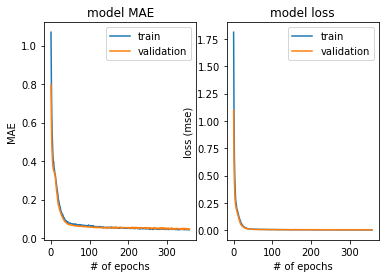

In [14]:
# Plot MAE and val_MAE over each epoch
fig, axs = plt.subplots(1, 2) 
(ax1, ax2) = axs

ax1.plot(history.history['mae'], label='train')
ax1.plot(history.history['val_mae'], label='validation')
ax1.set_title('model MAE')
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("MAE")

# Plot loss and val_loss over each epoch

ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='validation')
ax2.set_title('model loss')
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("loss (mse)")

plt.show()